
# L06-2 Probability and Descriptive Statistics Continued
## Assignment Instructions
Rename with your name in place of Studentname and make your edits and updates here.



# Lesson 6: Homework / Assesment

## Objective
Acquire hands-on experience with descriptive statistics and associated plots

## Questions To Answer
1. What are the central tendencies, standard deviation, and MAD of **Lot Area**?
2. Plot histogram of **Lot Area**. What can you tell about it? Is it skewed?
3. Assuming that housing dataset is a complete population and we can use it's standard deviation as population deviation, calculate 95% confidence interval for **Lot Area** mean from 200 size sample. Output: mean, -confidence interval, +confidence interval.
4. Plot normalized scatterplot **Lot Area** and **SalePrice**
5. What is correlation coefficient for **Lot Area** and **SalePrice**?

Tips: 
1. Remember to include required libraries and missing stat. functions from the lab.
2. Enclosing the expression in () will output the value of the expression. Example: (x <- 1) will output 1.

## Initial Setup

In [1]:
# Display directory contents. This directory should contain the data for this exercise: AmesHousing.xls
dir()                                           


[1] "AmesHousing.xls"                                                         
[2] "AmesHousingDataDictionary.txt"                                           
[3] "AmesHousingWithStats.xlsx"                                               
[4] "Bayes.xlsx"                                                              
[5] "LawrenceHuang-LabHw06-Probability-Descriptive-Statistics.ipynb"          
[6] "Studentname-L06-1-Lab-Center-Deviation-Histogram-Probability-Copy1.ipynb"
[7] "Studentname-L06-1-Lab-Center-Deviation-Histogram-Probability.ipynb"      
[8] "Studentname-LabHw06-Probability-Descriptive-Statistics-Copy1.ipynb"      
[9] "Studentname-LabHw06-Probability-Descriptive-Statistics.ipynb"

In [2]:
# R doesn't have a method to calculate mode statistic - create
# parameters: 
#    x - vector of values 
#    na_rm = FALSE 
# output: most frequently occuring element in x
stat_mode <- function(x, na_rm = FALSE) {
  if(na_rm){
    x = x[!is.na(x)]
  }
  
  ux <- unique(x)
  return(ux[which.max(tabulate(match(x, ux)))])
}

# R doesn't have a method to calculate deviation around mean - create 
# parameters: 
#    x - vector of values 
#    na_rm = FALSE 
# output: absolute deviation around mean
avgAD <- function(x, na_rm = FALSE)
{
  if(na_rm){
    x = x[!is.na(x)]
  }
  return(sum(abs(mean(x)-x))/length(x))
}


In [3]:
#Install packages if not already installed
library(readxl)
library(tidyverse)
library(corrgram)
library(caret)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [4]:
#load data

AmesHousing<-readxl::read_excel("AmesHousing.xls")

head(AmesHousing, 10)
str(AmesHousing)

Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,⋯,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,0526301100,020,RL,141,31770,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,0526350040,020,RH,80,11622,Pave,NA,Reg,Lvl,⋯,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,0526351010,020,RL,81,14267,Pave,NA,IR1,Lvl,⋯,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,0526353030,020,RL,93,11160,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,0527105010,060,RL,74,13830,Pave,NA,IR1,Lvl,⋯,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,0527105030,060,RL,78,9978,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,195500
7,0527127150,120,RL,41,4920,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,213500
8,0527145080,120,RL,43,5005,Pave,NA,IR1,HLS,⋯,0,NA,NA,NA,0,1,2010,WD,Normal,191500
9,0527146030,120,RL,39,5389,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,3,2010,WD,Normal,236500
10,0527162130,060,RL,60,7500,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,189000


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	2930 obs. of  82 variables:
 $ Order          : num  1 2 3 4 5 6 7 8 9 10 ...
 $ PID            : chr  "0526301100" "0526350040" "0526351010" "0526353030" ...
 $ MS SubClass    : chr  "020" "020" "020" "020" ...
 $ MS Zoning      : chr  "RL" "RH" "RL" "RL" ...
 $ Lot Frontage   : num  141 80 81 93 74 78 41 43 39 60 ...
 $ Lot Area       : num  31770 11622 14267 11160 13830 ...
 $ Street         : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley          : chr  "NA" "NA" "NA" "NA" ...
 $ Lot Shape      : chr  "IR1" "Reg" "IR1" "Reg" ...
 $ Land Contour   : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities      : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ Lot Config     : chr  "Corner" "Inside" "Corner" "Corner" ...
 $ Land Slope     : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood   : chr  "NAmes" "NAmes" "NAmes" "NAmes" ...
 $ Condition 1    : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition 2    : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ Bldg

## 1. Central tendencies, standard deviation, and MAD of Lot Area

Hint: `Lot Area` is two words.

In [5]:
# Question 1:
#central tendencies
meanLotArea <- mean(AmesHousing$'Lot Area')
medLotArea <- median(AmesHousing$'Lot Area')
modeLotArea <- stat_mode(AmesHousing$'Lot Area')
print(paste("mean (Lot Area) =",meanLotArea))
print(paste("median (Lot Area) =",medLotArea))
print(paste("mode (Lot Area) =",modeLotArea))

#standard deviation
S <- sd(AmesHousing$'Lot Area')
print(paste("standard deviation (Lot Area) =", S))

#MAD
meanAD <- avgAD(AmesHousing$'Lot Area')
print(paste("mean absolute deviation (Lot Area) =",meanAD))

[1] "mean (Lot Area) = 10147.9218430034"
[1] "median (Lot Area) = 9436.5"
[1] "mode (Lot Area) = 9600"
[1] "standard deviation (Lot Area) = 7880.01775943909"
[1] "mean absolute deviation (Lot Area) = 3427.42755326212"


## 2. Histogram Plot

Hint: Refer to Section 6.C in the Lab.

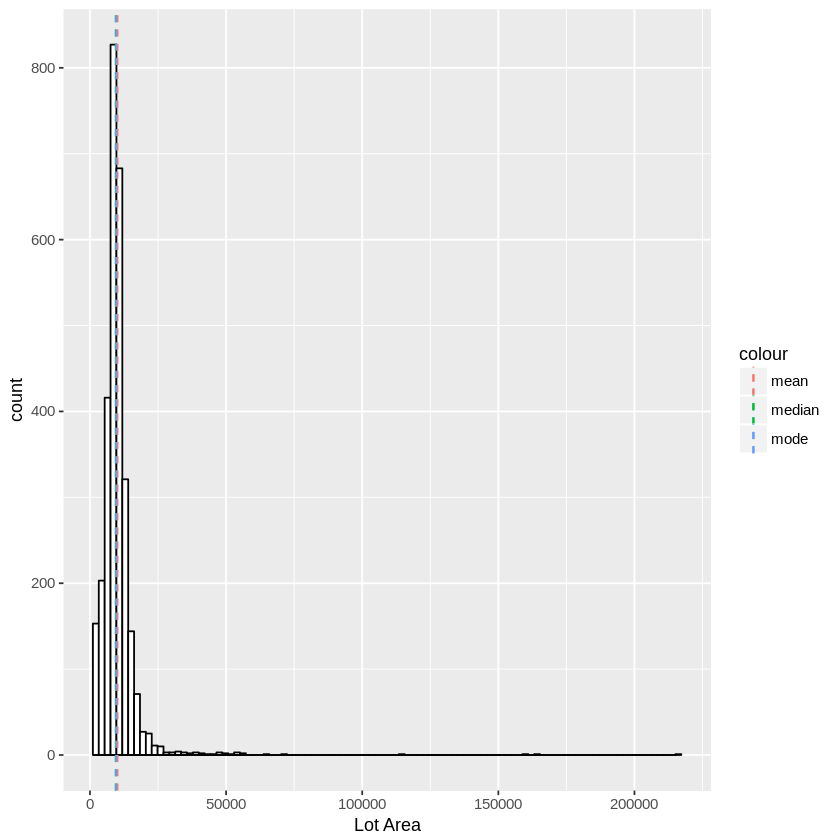

In [6]:
#Question 2:
# Histogram of lot area overlaid with density curve
# What can you tell about it? Is it skewed?

ggplot(AmesHousing, aes(x=`Lot Area`)) + 
  geom_histogram(aes(y=..count..),      # Density on y-axis
                 color="black", fill="white",
                 bins = 100) +
  geom_density(alpha=.2, fill="#FF7777") + # Overlay with density plot
  geom_vline(aes(xintercept=mean(`Lot Area`), color="mean"), linetype="dashed", size=.5) + #vertical line for mean
  geom_vline(aes(xintercept=median(`Lot Area`), color="median"), linetype="dashed", size=.5) + #vertical line for mean
  geom_vline(aes(xintercept=stat_mode(`Lot Area`), color="mode"), linetype="dashed", size=.5)  #vertical line for mode


The right tail of the distribution is longer and the mean is greater than the median and the mode. Positively skewed/right-skewed.

## 3. Mean, -confidence interval, +confidence interval

Hint: Refer to Section 6.5.1 in the Lab.

In [7]:
#Question 3:
#Assuming that housing dataset is a complete population and we can use its standard deviation as population deviation,
#calculate 95% confidence interval for **Lot Area** mean from 200 size sample. 
#Output: mean, -confidence interval, +confidence interval.

sample_size <- 200
sample <- sample(AmesHousing$`Lot Area`, sample_size)
print("mean:")
mean(sample) 
print("-confidence interval:")
(mean(sample)-qnorm(0.975)*sd(AmesHousing$'Lot Area')/sqrt(sample_size))
print("+confidence interval:")
(mean(sample)+qnorm(0.975)*sd(AmesHousing$'Lot Area')/sqrt(sample_size))

[1] "mean:"


[1] 9890.955

[1] "-confidence interval:"


[1] 8798.86

[1] "+confidence interval:"


[1] 10983.05

## 4. Normalized Scatterplot

Hint: Refer to Section 6.5.2 in the Lab

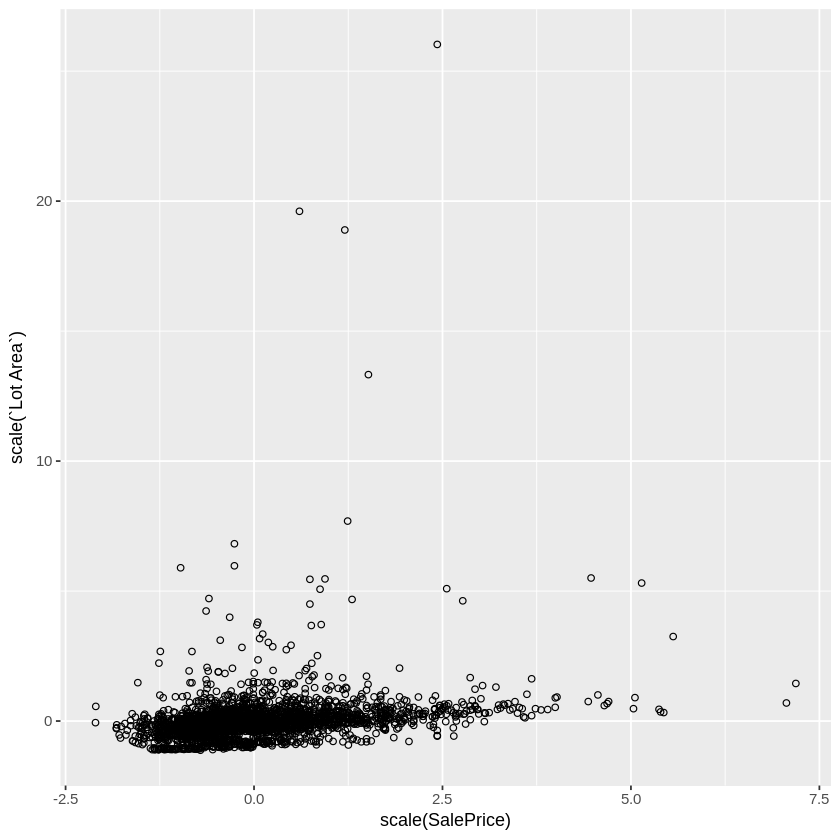

In [8]:
#Question 4:
# Plot normalized scatterplot **Lot Area** and **SalePrice**

ggplot(AmesHousing,aes(x = scale(SalePrice), y=scale(`Lot Area`))) +
    geom_point(shape=1) 

## 5. Correlation Matrix

Hint: Refer to Section 6.6 in the Lab

In [9]:
#Question 5: What is correlation coefficient for **Lot Area** and **SalePrice**?
(corMatrix <- cor((na.omit(AmesHousing[, c("Lot Area", "SalePrice")]))))
print("correlation coefficient:")
corMatrix[c("Lot Area"),c("SalePrice")]

,Lot Area,SalePrice
Lot Area,1.0000000,0.2665492
SalePrice,0.2665492,1.0000000


[1] "correlation coefficient:"


[1] 0.2665492